LIBRARIES

In [50]:
import pandas  as pd
import numpy as np

READ CSV FILE


In [51]:
df=pd.read_csv("loan_approval_dataset.csv",index_col=1)

In [52]:
df.head()

,loan_id,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,,,,,,,,,,,,
2,1,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
0,2,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [53]:
df.columns

Index(['loan_id', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [54]:
df.shape

(4269, 12)

In [55]:
df.duplicated().sum()

np.int64(0)

PREPROCESSING

In [56]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
df[" education"]=ln.fit_transform(df[" education"])
df[" self_employed"]=ln.fit_transform(df[" self_employed"])

In [57]:
df

,loan_id,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,,,,,,,,,,,,
2,1,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
0,2,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
5,4265,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
0,4266,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
2,4267,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


SPLIT

In [58]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=[" loan_status"])
y=df[' loan_status']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [60]:
X.shape

(4269, 11)

In [61]:
y.shape

(4269,)

PREPROCESSING AGAIN

In [62]:
from sklearn.preprocessing import StandardScaler
sd_s=StandardScaler()
X_train=sd_s.fit_transform(X_train)
X_test=sd_s.transform(X_test)


MODEL TRAINING

In [63]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion="entropy",splitter="best")

In [64]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
y_pred=d_tree.predict(X_test)

MODEL ACCURACY

In [66]:
print(f"{d_tree.score(X_test,y_test)*100 : .2f} %")

 98.36 %


MODEL EVALUTION

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

In [68]:
d_tree_accuracy=accuracy_score(y_test,y_pred)
d_tree_confusion=confusion_matrix(y_test,y_pred)


In [69]:
d_tree_confusion

array([[525,   8],
       [  6, 315]])

In [73]:
import matplotlib.pyplot as plt
from sklearn import tree


[Text(0.756578947368421, 0.9736842105263158, 'x[6] <= -0.298\nentropy = 0.957\nsamples = 3415\nvalue = [2123, 1292]'),
 Text(0.5921052631578947, 0.9210526315789473, 'x[5] <= -1.031\nentropy = 0.468\nsamples = 1425\nvalue = [142, 1283]'),
 Text(0.6743421052631579, 0.9473684210526316, 'True  '),
 Text(0.5657894736842105, 0.868421052631579, 'x[4] <= 1.378\nentropy = 1.0\nsamples = 277\nvalue = [142, 135]'),
 Text(0.5394736842105263, 0.8157894736842105, 'x[3] <= 0.711\nentropy = 0.995\nsamples = 250\nvalue = [115, 135]'),
 Text(0.47368421052631576, 0.7631578947368421, 'x[4] <= 0.362\nentropy = 0.994\nsamples = 192\nvalue = [105, 87]'),
 Text(0.42105263157894735, 0.7105263157894737, 'x[8] <= 0.507\nentropy = 0.998\nsamples = 163\nvalue = [77.0, 86.0]'),
 Text(0.39473684210526316, 0.6578947368421053, 'x[3] <= 0.157\nentropy = 0.993\nsamples = 140\nvalue = [77, 63]'),
 Text(0.3684210526315789, 0.6052631578947368, 'x[4] <= -0.537\nentropy = 0.975\nsamples = 130\nvalue = [77, 53]'),
 Text(0.315

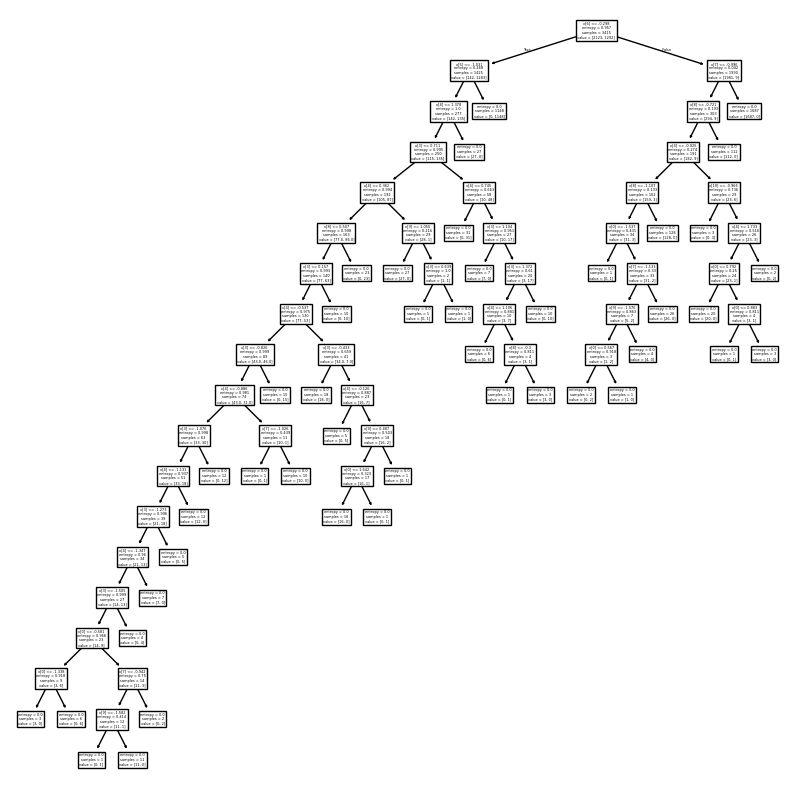

In [82]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,10),dpi=100)
tree.plot_tree(d_tree)